### AIDS Virus Infection Prediction
#### Attribute Information
- time: time to failure or censoring
- trt: treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)
- age: age (yrs) at baseline
- wtkg: weight (kg) at baseline
- hemo: hemophilia (0=no, 1=yes)
- homo: homosexual activity (0=no, 1=yes)
- drugs: history of IV drug use (0=no, 1=yes)
- karnof: Karnofsky score (on a scale of 0-100)
- oprior: Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)
- z30: ZDV in the 30 days prior to 175 (0=no, 1=yes)
- preanti: days pre-175 anti-retroviral therapy
- race: race (0=White, 1=non-white)
- gender: gender (0=F, 1=M)
- str2: antiretroviral history (0=naive, 1=experienced)
- strat: antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks)
- symptom: symptomatic indicator (0=asymp, 1=symp)
- treat: treatment indicator (0=ZDV only, 1=others)
- offtrt: indicator of off-trt before 96+/-5 weeks (0=no,1=yes)
- cd40: CD4 at baseline
- cd420: CD4 at 20+/-5 weeks
- cd80: CD8 at baseline
- cd820: CD8 at 20+/-5 weeks
- infected: is infected with AIDS (0=No, 1=Yes)

#### Additional Variable Information
- Personal information : age, weight, race, gender, sexual activity
- Medical history : hemophilia, history of IV drugs
- Treatment history : ZDV/non-ZDV treatment history
- Lab results : CD4/CD8 counts

In [2]:
import pandas as pd

a_df = pd.read_csv('./datasets/AIDS_Classification_50000.csv', low_memory=False)
a_df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


In [3]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'trt'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'wtkg'}>,
        <Axes: title={'center': 'hemo'}>],
       [<Axes: title={'center': 'homo'}>,
        <Axes: title={'center': 'drugs'}>,
        <Axes: title={'center': 'karnof'}>,
        <Axes: title={'center': 'oprior'}>,
        <Axes: title={'center': 'z30'}>],
       [<Axes: title={'center': 'preanti'}>,
        <Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'str2'}>,
        <Axes: title={'center': 'strat'}>],
       [<Axes: title={'center': 'symptom'}>,
        <Axes: title={'center': 'treat'}>,
        <Axes: title={'center': 'offtrt'}>,
        <Axes: title={'center': 'cd40'}>,
        <Axes: title={'center': 'cd420'}>],
       [<Axes: title={'center': 'cd80'}>,
        <Axes: title={'center': 'cd820'}>,
        <Axes: title={'center': 'infected'}>, <Axes: >, <Axes: >

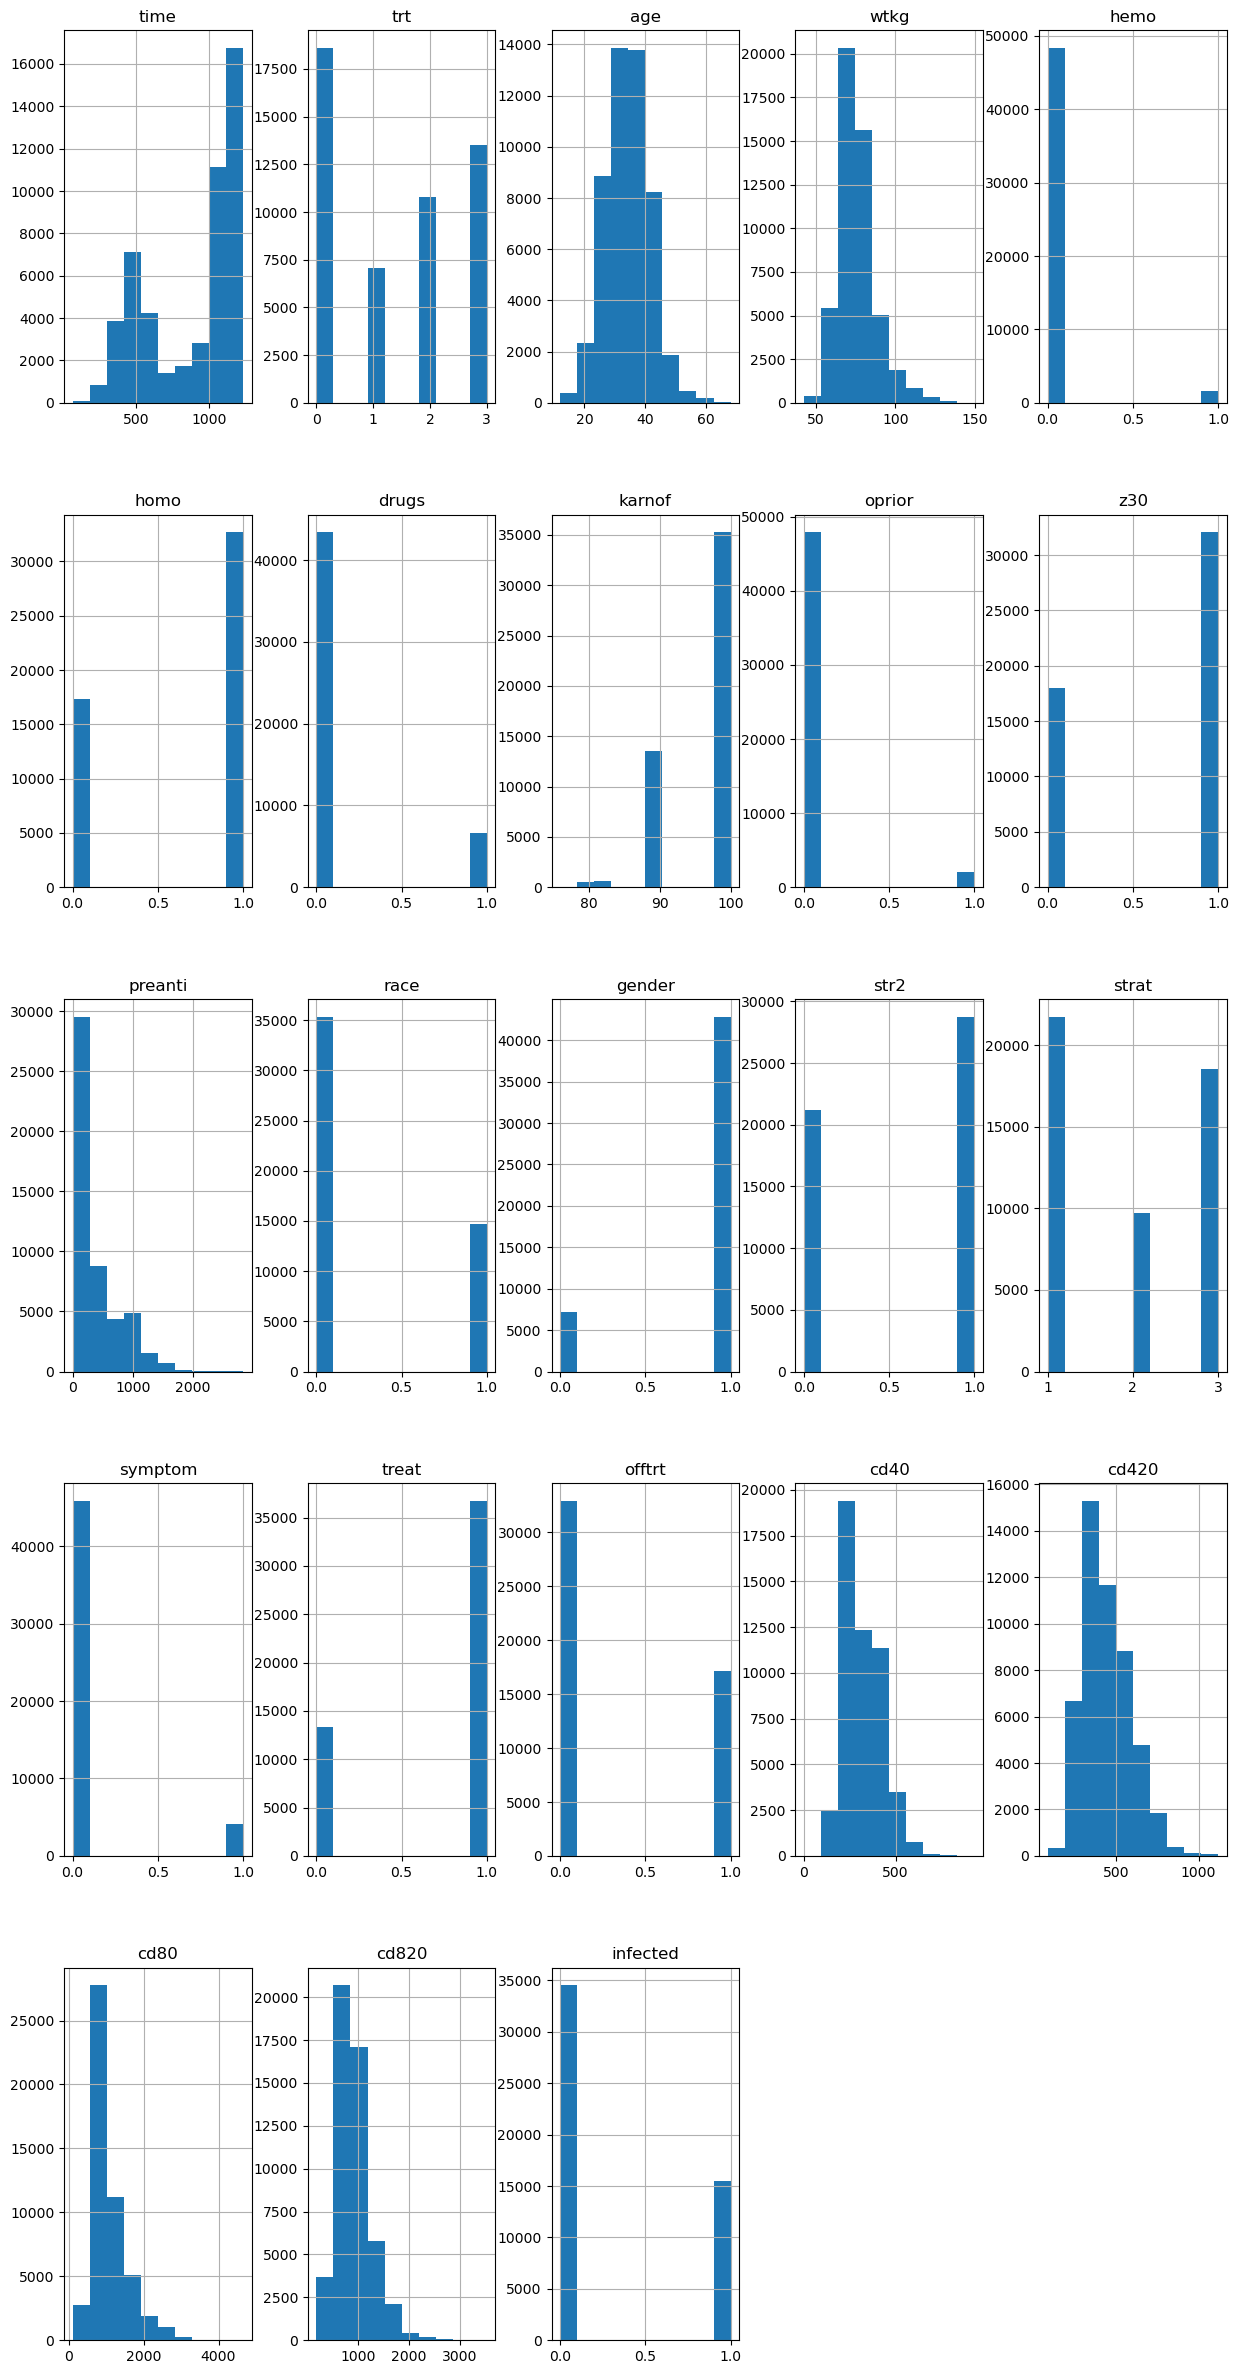

In [4]:
a_df.hist(figsize=(15, 30))

In [6]:
columns = ['time', 'age' , 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80','cd820','infected']

pre_a_df = a_df.loc[:, columns]
pre_a_df

,time,age,wtkg,preanti,cd40,cd420,cd80,cd820,infected
0,1073,37,79.46339,18,322,469,882,754,1
1,324,33,73.02314,224,168,575,1035,1525,1
2,495,43,69.47793,0,377,333,1147,1088,1
3,1201,42,89.15934,513,238,324,775,1019,1
4,934,37,137.46581,4,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...
49995,953,46,61.28204,1089,234,402,481,1014,0
49996,1036,42,73.36768,312,369,575,514,657,0
49997,1157,40,78.75824,0,308,663,1581,863,0
49998,596,31,52.20371,0,349,440,470,865,1


In [7]:
pre_a_df.corr()['infected'].sort_values(ascending=False)[1:]

preanti    0.172826
age        0.028718
cd80      -0.010172
cd820     -0.017166
wtkg      -0.055527
time      -0.102671
cd40      -0.140689
cd420     -0.183028
Name: infected, dtype: float64

In [9]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               infected   R-squared (uncentered):                   0.337
Model:                            OLS   Adj. R-squared (uncentered):              0.336
Method:                 Least Squares   F-statistic:                              3170.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:41:05   Log-Likelihood:                         -31420.
No. Observations:               50000   AIC:                                  6.286e+04
Df Residuals:                   49992   BIC:                                  6.293e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [11]:
get_vif(features)

,vif_score,feature
0,8.796868,time
1,18.547515,age
2,26.257783,wtkg
3,1.705686,preanti
4,10.315628,cd40
5,10.244742,cd420
6,5.400170,cd80
7,7.619670,cd820


In [13]:
pre_a_df = pre_a_df.drop(labels=['age','wtkg'], axis=1)
pre_a_df

,time,preanti,cd40,cd420,cd80,cd820,infected
0,1073,18,322,469,882,754,1
1,324,224,168,575,1035,1525,1
2,495,0,377,333,1147,1088,1
3,1201,513,238,324,775,1019,1
4,934,4,500,443,1601,849,0
...,...,...,...,...,...,...,...
49995,953,1089,234,402,481,1014,0
49996,1036,312,369,575,514,657,0
49997,1157,0,308,663,1581,863,0
49998,596,0,349,440,470,865,1


In [14]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               infected   R-squared (uncentered):                   0.313
Model:                            OLS   Adj. R-squared (uncentered):              0.313
Method:                 Least Squares   F-statistic:                              3804.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:42:09   Log-Likelihood:                         -32276.
No. Observations:               50000   AIC:                                  6.456e+04
Df Residuals:                   49994   BIC:                                  6.462e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'preanti'}>,
        <Axes: title={'center': 'cd40'}>],
       [<Axes: title={'center': 'cd420'}>,
        <Axes: title={'center': 'cd80'}>,
        <Axes: title={'center': 'cd820'}>],
       [<Axes: title={'center': 'infected'}>, <Axes: >, <Axes: >]],
      dtype=object)

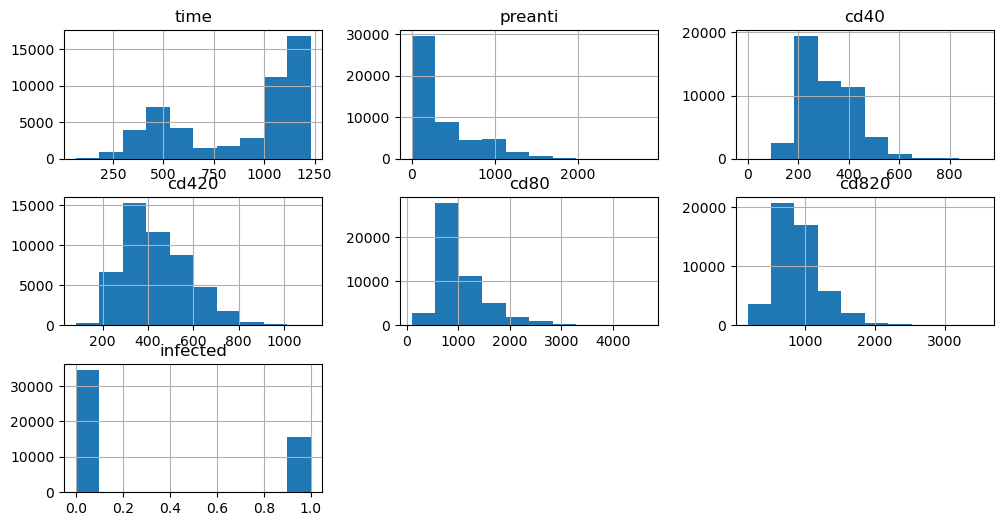

In [16]:
pre_a_df.hist(figsize=(12, 6))

In [17]:
a_df.infected.value_counts()

infected
0    34494
1    15506
Name: count, dtype: int64

In [21]:
infect0 = a_df[a_df.infected == 0].sample(15506, random_state=124)
infect1 = a_df[a_df.infected == 1]

pre_a_df = pd.concat([infect0, infect1]).reset_index(drop=True)

In [22]:
pre_a_df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1124,0,37,72.12169,0,1,0,100,0,0,...,1,1,0,0,0,358,462,1119,548,0
1,438,2,36,121.77603,0,1,0,100,0,1,...,1,3,0,1,1,257,272,754,436,0
2,1110,0,22,92.47132,0,0,0,100,0,0,...,0,1,0,0,1,221,801,1569,517,0
3,1143,0,30,84.09324,0,1,0,100,0,0,...,0,1,0,0,0,367,485,647,476,0
4,1115,0,36,68.39284,0,0,0,100,0,0,...,0,1,0,0,1,464,438,465,535,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31007,780,3,33,71.04946,0,1,0,90,0,1,...,1,3,0,1,0,310,203,989,814,1
31008,1146,1,40,73.07569,0,1,0,100,0,1,...,1,3,0,1,1,253,573,876,496,1
31009,1047,3,35,77.09818,0,0,0,100,0,0,...,1,2,0,1,1,473,515,743,1659,1
31010,1122,1,34,56.65830,0,1,0,90,0,1,...,1,3,0,0,1,187,345,692,978,1


In [24]:
pre_a_df1 = pre_a_df[columns]
pre_a_df1

,time,age,wtkg,preanti,cd40,cd420,cd80,cd820,infected
0,1124,37,72.12169,434,358,462,1119,548,0
1,438,36,121.77603,1521,257,272,754,436,0
2,1110,22,92.47132,15,221,801,1569,517,0
3,1143,30,84.09324,0,367,485,647,476,0
4,1115,36,68.39284,0,464,438,465,535,0
...,...,...,...,...,...,...,...,...,...
31007,780,33,71.04946,863,310,203,989,814,1
31008,1146,40,73.07569,466,253,573,876,496,1
31009,1047,35,77.09818,352,473,515,743,1659,1
31010,1122,34,56.65830,429,187,345,692,978,1


In [25]:
from statsmodels.api import OLS

features, targets = pre_a_df1.iloc[:, :-1], pre_a_df1.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               infected   R-squared (uncentered):                   0.517
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              4147.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:45:49   Log-Likelihood:                         -21975.
No. Observations:               31012   AIC:                                  4.397e+04
Df Residuals:                   31004   BIC:                                  4.403e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
from statsmodels.api import OLS

features, targets = pre_a_df.iloc[:, :-1], pre_a_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               infected   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.560
Method:                 Least Squares   F-statistic:                              1795.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:46:03   Log-Likelihood:                         -20516.
No. Observations:               31012   AIC:                                  4.108e+04
Df Residuals:                   30990   BIC:                                  4.126e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------